In [1]:
from fwell.fwell import FWell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

outer_bound = "nnnn"
top_bound = "imp"
bottom_bound = 'imp'
wtype = 'hor'
nseg = 20
nwells = 1
Xe = 1000
Ye = 1000
Xf = 100
xw = Xe/2
yw = Ye/2
xwds = [xw/Xf]
ywds = [yw/Xf]
xed = Xe/Xf
yed = Ye/Xf
Fcd = 10
k = 10
h = 10
Lh = 500
rw = 0.1
hd = 2*h/Lh
rwd = rw/h
zwds = [0.5]
ct = 1e-5
mu = 1
B = 1
fi = 0.1
Q = 100
ts = np.logspace(-2,3, 100)
CT = 0.00036*k/(fi*mu*ct*Xf*Xf)
CP = Q*18.42*mu*B/(k*h)
tds = ts*CT
fwell = FWell(outer_bound, top_bound, bottom_bound, wtype, nseg, nwells, xwds, ywds, xed=xed, yed=yed,
              zwds=zwds, hd=hd, rwd=rwd, attrs={'Fcd': Fcd})
fpds = []

df = pd.read_csv('./saphire/test2.txt', delim_whitespace=True, skiprows = 1)
t_saph = np.array(df["(hr)"])
p_saph = np.array(df["(atm)"])
for t in t_saph:
    if t == 0:
        fpds.append(0)
    else:
        fpds.append(fwell.pw(t*CT))
    break
fpds = np.array(fpds)
# dp_saph = np.abs(p_saph-p_saph[0])
# plt.plot(t_saph, dp_saph)
# plt.plot(t_saph,CP*fpds)

In [2]:
fwell.pw(1)

1.3784159890724368

In [2]:
from fwell.ffunc.ffuncs import *
from fwell.buffer import Buffer
# ih1F2H(zd, zwd, x1, x2, u, ksid, ksiwd, ksied, ksiede, hd, yd, ywd, buf, fid)
# ihF2E(zd, zwd, x1, x2, u, ksid, ksiwd, ksied, ksiede, hd, yd, ywd, yed, buf, fid)

In [7]:
xd, xwd, yd, ywd, x1, x2 = fwell.lw.xd, fwell.lw.xwd, fwell.lw.yd, fwell.lw.ywd, fwell.lw.x1, fwell.lw.x2
print(xd.shape, xwd.shape, yd.shape, ywd.shape)

(40, 40) (40, 40) (40, 40) (40, 40)


In [4]:
zd = 0.6*np.ones_like(xd)
zwd = zd+0.01

In [5]:
s = 1
u = s
hd = 0.1
buf = Buffer()
%timeit -n1 -r1 ihF2E(zd, zwd, x1,x2,u,xd,xwd,xed,xed,hd,yd,ywd,yed,buf, "1")

80.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
%timeit -n10 -r1  ih1F2H(zd, zwd, x1, x2, u, xd, xwd, xed, xed, hd, yd, ywd, buf, "3")
m = ih1F2H(zd, zwd, x1, x2, u, xd, xwd, xed, xed, hd, yd, ywd, buf, "3")

65.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


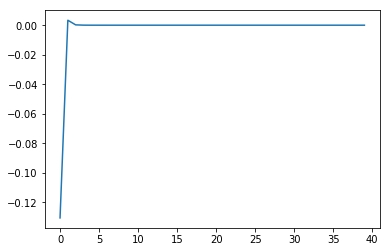

In [7]:
plt.plot((m[0,:]))

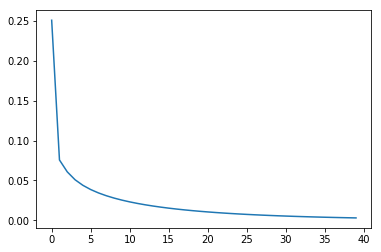

In [9]:
from fwell.ffunc.hor import matr_pd_hor_nnnn
plt.plot(matr_pd_hor_nnnn(u, x1, x2, zd, zwd, hd, xd, xwd, xed, yd, ywd, yed, buf)[0,:])

In [10]:
vals = []
ary = None
PI = np.pi
blk_size = 10
MAXITER = 10
for i in range(MAXITER) :
    for n in np.arange(1+i*blk_size, 1+(i+1)*blk_size):
        v = i1F2H(x1, x2, u, xd, xwd, xed, xed, n*PI/hd, yd, ywd, buf, "4").flatten()
        if ary is None:
            ary = v
        else:
            ary = np.vstack([ary, v])

In [11]:
vals1 = []
PI = np.pi
blk_size = 10
MAXITER = 10
ary1, ary2, ary3 = None, None, None
for i in range(MAXITER) :
    for n in np.arange(1+i*blk_size, 1+(i+1)*blk_size):
        v = i1F2H_(x1, x2, u, xd, xwd, xed, xed, n*PI/hd, yd, ywd, buf, "5")
        if ary1 is None:
            ary1, ary2, ary3 = v[0].flatten(), v[1].flatten(), v[2].flatten()
        else:
            ary1 = np.vstack([ary1, v[0].flatten()])
            ary2 = np.vstack([ary2, v[1].flatten()])
            ary3 = np.vstack([ary3, v[2].flatten()])

In [12]:
ary3

array([[ 9.99493779e-02, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  9.99493779e-02],
       [ 4.99936686e-02, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  4.99936686e-02],
       [ 3.33314572e-02, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  3.33314572e-02],
       ...,
       [ 1.00020004e-05, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.00020004e-05],
       [ 1.00010001e-05, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.00010001e-05],
       [ 1.00000000e-05, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00,  1.00000000e-05]])

In [25]:
%timeit -n10 -r10 i1F2H_(x1, x2, u, xd, xwd, xed, xed, 1*PI/hd, yd, ywd, buf, "150")
%timeit -n10 -r10 i1F2H(x1, x2, u, xd, xwd, xed, xed, 1*PI/hd, yd, ywd, buf, "151")

1.38 ms ± 42 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.05 ms ± 16.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [29]:
ary3[3,:].reshape(40,40)

array([[ 0.02499921, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.02499921, -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        ,  0.02499921, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ...,  0.02499921,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
         0.02499921, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        ,  0.02499921]])

In [32]:
x1[ary3[3,:].reshape(40,40)>0]

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95])

In [39]:
xx=x2[ary3[3,:].reshape(40,40)>0]
dum = np.zeros_like(x2)
dum[ary3[3,:].reshape(40,40)>0] = iti0k0(abs(xx))[1]
dum

array([[1.22068433, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.19721752, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.1719578 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.19721752, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.22068433,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.24250985]])

In [28]:
ary1[0,0], ary2[0,0]

(-0.013813374511612778, -0.013813374511612778)

In [29]:
ary

array([[7.23226288e-02, 1.17736582e-02, 1.69065388e-03, ...,
        1.69065388e-03, 1.17736582e-02, 7.23226288e-02],
       [4.48469106e-02, 2.49931444e-03, 7.14897087e-05, ...,
        7.14897087e-05, 2.49931444e-03, 4.48469106e-02],
       [3.19693702e-02, 6.77098763e-04, 3.91651693e-06, ...,
        3.91651693e-06, 6.77098763e-04, 3.19693702e-02],
       ...,
       [1.00020004e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00020004e-05],
       [1.00010001e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00010001e-05],
       [1.00000000e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-05]])

In [30]:
buf.yd0s_5

{'0_1': (array([ 8.025,  8.075,  8.125,  8.175,  8.225,  8.275,  8.325,  8.375,
          8.425,  8.475,  8.525,  8.575,  8.625,  8.675,  8.725,  8.775,
          8.825,  8.875,  8.925,  8.975,  9.025,  9.075,  9.125,  9.175,
          9.225,  9.275,  9.325,  9.375,  9.425,  9.475,  9.525,  9.575,
          9.625,  9.675,  9.725,  9.775,  9.825,  9.875,  9.925,  9.975,
         10.025, 10.075, 10.125, 10.175, 10.225, 10.275, 10.325, 10.375,
         10.425, 10.475, 10.525, 10.575, 10.625, 10.675, 10.725, 10.775,
         10.825, 10.875, 10.925, 10.975, 11.025, 11.075, 11.125, 11.175,
         11.225, 11.275, 11.325, 11.375, 11.425, 11.475, 11.525, 11.575,
         11.625, 11.675, 11.725, 11.775, 11.825, 11.875, 11.925, 11.975]),
  array([39, 38, 37, ..., 42, 41, 40]),
  1600,
  array([1., 1., 1., ..., 1., 1., 1.]),
  array([-1., -1., -1., ..., -1., -1., -1.])),
 '0_-1': (array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
         0.475, 0.525, 0.575, 0.625, 0.675, 0.

In [31]:
ary3

array([[ 2., -0., -0., ..., -0., -0.,  2.],
       [ 2., -0., -0., ..., -0., -0.,  2.],
       [ 2., -0., -0., ..., -0., -0.,  2.],
       ...,
       [ 2., -0., -0., ..., -0., -0.,  2.],
       [ 2., -0., -0., ..., -0., -0.,  2.],
       [ 2., -0., -0., ..., -0., -0.,  2.]])

In [32]:
dx = 0.025
2*iti0k0(dx)[1]

0.24025392940873147

In [33]:
from fwell.ffunc.ffuncs import ki1

In [34]:
np.pi - 2*ki1(dx)

0.24025392940873136

In [35]:
ki1(dx)

1.4506693620905309

In [36]:
ary1

array([[-1.38133745e-02, -2.03971627e-03, -3.49062391e-04, ...,
         2.03971627e-03,  1.38133745e-02, -1.38133745e-02],
       [-2.57337903e-03, -7.40645862e-05, -2.57487748e-06, ...,
         7.40645862e-05,  2.57337903e-03, -2.57337903e-03],
       [-6.81043499e-04, -3.94473611e-06, -2.82191820e-08, ...,
         3.94473611e-06,  6.81043499e-04, -6.81043499e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [37]:
ary

array([[7.23226288e-02, 1.17736582e-02, 1.69065388e-03, ...,
        1.69065388e-03, 1.17736582e-02, 7.23226288e-02],
       [4.48469106e-02, 2.49931444e-03, 7.14897087e-05, ...,
        7.14897087e-05, 2.49931444e-03, 4.48469106e-02],
       [3.19693702e-02, 6.77098763e-04, 3.91651693e-06, ...,
        3.91651693e-06, 6.77098763e-04, 3.19693702e-02],
       ...,
       [1.00020004e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00020004e-05],
       [1.00010001e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00010001e-05],
       [1.00000000e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-05]])

In [38]:
ary2

array([[-1.38133745e-02,  1.38133745e-02,  2.03971627e-03, ...,
        -3.49062391e-04, -2.03971627e-03, -1.38133745e-02],
       [-2.57337903e-03,  2.57337903e-03,  7.40645862e-05, ...,
        -2.57487748e-06, -7.40645862e-05, -2.57337903e-03],
       [-6.81043499e-04,  6.81043499e-04,  3.94473611e-06, ...,
        -2.82191820e-08, -3.94473611e-06, -6.81043499e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])